# Data Editor: Trial Task 
Submission by: *Dénes Csala*

📊 This is a visual explanation of the solve-through of the trial task. It is an interactive [Jupyter](https://jupyter.org/) notebook. 
* Feel free to download it (first icon from the right in the top menu) it and run it locally (you will need a local [Jupyter](https://jupyter.org/) installation, I recommend [Anaconda](http://www.anaconda.com/)) to regenerate the outputs. 
* You can also launch a live copy of it in the cloud on [Binder](https://mybinder.org/) by clicking the second icon from the right or by reuploading the downloaded _.ipynb_ file to [Google Colab](https://colab.research.google.com/). 
* If you decide to run it locally, you will also need the [Altair](https://altair-viz.github.io/getting_started/installation.html) package. 
* If you want to be fancy and run everything locally, without the need for the _Vega-Lite_ renderer server, also install the [altair_saver](https://github.com/altair-viz/altair_saver/) and [altair_viewer](https://github.com/altair-viz/altair_viewer/) packages.

## First steps

Import dependencies

In [235]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [236]:
colors=['#e6224b','#0063af']

In [237]:
fi=pd.read_csv('fig1_fiscalsupport.csv')
nofi=pd.read_csv('fig1_nofiscalsupport.csv')

<AxesSubplot:xlabel='death %'>

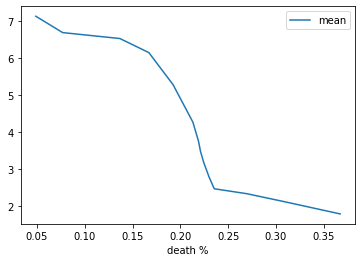

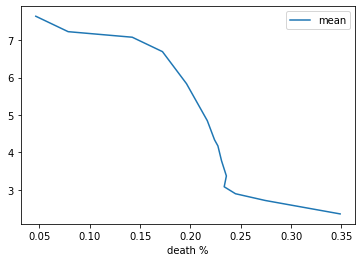

In [238]:
fi.plot('death %','mean',kind='line')
nofi.plot('death %','mean',kind='line')

In [242]:
base = alt.Chart(fi).encode(
    alt.X('death %', axis=alt.Axis(title=None), sort=[])
)

area = base.mark_area(opacity=0.15, color=colors[0]).encode(
    alt.Y('p90',
          axis=alt.Axis(title='', titleColor='#57A44C')),
    alt.Y2('p10')
)
line = base.mark_line(stroke=colors[0]).encode(
    alt.Y('mean',
          axis=alt.Axis())
)
point = base.mark_point(fill=colors[0],stroke=colors[0]).encode(
    alt.Y('mean',
          axis=alt.Axis())
)

layer1=alt.layer(area, line, point)

In [243]:
base = alt.Chart(nofi).encode(
    alt.X('death %', axis=alt.Axis(title=None), sort=[])
)

area = base.mark_area(opacity=0.15, color=colors[1]).encode(
    alt.Y('p90',
          axis=alt.Axis(title='', titleColor='#57A44C')),
    alt.Y2('p10')
)
line = base.mark_line(stroke=colors[1]).encode(
    alt.Y('mean',
          axis=alt.Axis())
)
point = base.mark_point(fill=colors[1],stroke=colors[1]).encode(
    alt.Y('mean',
          axis=alt.Axis())
)

layer2=alt.layer(area, line, point)

In [241]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

selectors = alt.Chart(nofi).mark_point().encode(
    x='death %',
    opacity=alt.value(0),
).add_selection(
    nearest
)
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)
rules = alt.Chart(nofi).mark_rule(color='gray').encode(
    x='death %',
).transform_filter(
    nearest
)

# (layer1+layer2+selectors).configure_view(
#         continuousHeight=420,
#         continuousWidth=610)

alt.layer(
    layer1, layer2, line, selectors, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)

In [245]:
year_slider = alt.binding_range(min=1969, max=2018, step=1)
# A dropdown filter
genre_dropdown = alt.binding_select(options=['ldsize_0.0','ldlength_4.0'])
genre_select = alt.selection_single(fields=['model'], bind=genre_dropdown, name="Genre")
filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

(layer1+layer2).configure_view(
        continuousHeight=420,
        continuousWidth=610)


alt.LayerChart(...)

In [246]:
import altair as alt
from vega_datasets import data

movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

# A slider filter
year_slider = alt.binding_range(min=1969, max=2018, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['Release_Year'], name="Release Year_")


filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title="Slider Filtering")

# A dropdown filter
genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

#color changing marks
rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['MPAA_Rating'], bind=rating_radio, name="Rating")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('MPAA_Rating:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = base.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

# Boolean selection for format changes
input_checkbox = alt.binding_checkbox()
checkbox_selection = alt.selection_single(bind=input_checkbox, name="Big Budget Films")

size_checkbox_condition = alt.condition(checkbox_selection,
                                        alt.SizeValue(25),
                                        alt.Size('Hundred_Million_Production:Q')
                                       )

budget_sizing = base.add_selection(
    checkbox_selection
).encode(
    size=size_checkbox_condition
).properties(title="Checkbox Formatting")

( filter_year | filter_genres) &  (highlight_ratings | budget_sizing  )

alt.VConcatChart(...)

In [234]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

base = alt.Chart(source).encode(
    alt.X('month(date):T', axis=alt.Axis(title=None))
)

area = base.mark_area(opacity=0.3, color='#57A44C').encode(
    alt.Y('average(temp_max)',
          axis=alt.Axis(title='Avg. Temperature (°C)', titleColor='#57A44C')),
    alt.Y2('average(temp_min)')
)

line = base.mark_line(stroke='#5276A7', interpolate='monotone').encode(
    alt.Y('average(precipitation)',
          axis=alt.Axis(title='Precipitation (inches)', titleColor='#5276A7'))
)

alt.layer(area, line).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

❗ After a pixelwise inspection we see that the red line is slightly shifted when compared to the original _FRED_ graph. This is because the _DRTSCIS_ dataset has clearly a monthly frequency (quarterly, actually, but this is irrelevant here). However, when the data exporter on the _FRED_ site was set up, it clearly generates the month labels - i.e. `2020-12`, which then automatically gets appended with a `-01` upon the _.csv_ export. However, as we have already noted, the months actually indicate the ends of the months. Therefore, we need to fix the time labels to reflect thsi change and `2020-03-01` becomes `2020-03-31`. This, of course, is not so straighforward, since the months has differnet durations. We, therefore do a trick here:
* For each month we add 1 to the month number, so that `2020-03-01` becomes `2020-04-01`
* We then substract one day, so it becomes `2020-03-31` for March, or `2020-02-29` for February

In [15]:
df1['DATE']=pd.to_datetime(df1['DATE'].dt.year.astype(str)+'-'+(df1['DATE'].dt.month+1).astype(str)+'-01')+pd.to_timedelta('-1d')

🚀 The plot looks perfectly aligned and quite good now!

In [16]:
plotter(df1,df2,dr)

alt.LayerChart(...)

### 📤 Data export

The task is almost finished, but we have used `pandas` _dataframes_ as inputs for `Altair`. We now convert these to _.csv_, as per the task's requirement. First, save the _dataframes_ to _.csv_: 💾

In [17]:
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')

Next, upload to [GitHub](https://github.com/csaladenes/eco) ... then return here. We then set up for local loading and viewing.

In [18]:
import json
import altair_viewer
import os
cwd = os.getcwd()

In [19]:
%%capture c
!jupyter-notebook list

In [20]:
local_path='http'+c.stdout.split('http')[1].split('?token')[0]+'tree'+(cwd.replace('\\','/')+'/')[2:]
github_url='https://raw.githubusercontent.com/csaladenes/eco/main/'

Since we have already the set up the plotter in a way that it can accept a _dataframe_ directly as an input, but also a _.csv_ or a _.json_ file, we can call it again, but this time with the _.csv_ file arguments.  
### 🤩 The finished product

In [21]:
# plotter(local_path+'df1.csv',local_path+'df2.csv',dr)
p=plotter(github_url+'df1.csv',github_url+'df2.csv',dr)
p

alt.LayerChart(...)

🔧 Here is the `Vega-Lite` config:

In [22]:
p.save('config.json')
config=json.loads(open('config.json','r').read())
config

{'config': {'view': {'continuousWidth': 700, 'continuousHeight': 250}},
 'layer': [{'data': {'name': 'data-2b08226b30bbb08a20f45bc01ddaafde'},
   'mark': {'type': 'rect', 'blend': 'darken'},
   'encoding': {'color': {'type': 'nominal', 'field': 'color', 'scale': None},
    'x': {'type': 'temporal', 'field': 'start'},
    'x2': {'field': 'end'}}},
  {'layer': [{'data': {'url': 'https://raw.githubusercontent.com/csaladenes/eco/main/df2.csv'},
     'mark': {'type': 'line', 'color': '#557CAA', 'line': True},
     'encoding': {'x': {'type': 'temporal',
       'axis': {'grid': False, 'tickCount': 10},
       'field': 'DATE',
       'title': None},
      'y': {'type': 'quantitative',
       'axis': {'format': '.1f',
        'grid': True,
        'tickCount': 9,
        'titleFontWeight': 'normal',
        'values': [0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0]},
       'field': 'BAMLH0A0HYM2',
       'scale': {'domain': [0, 20]},
       'title': 'Percent'}}},
    {'data': {'url': 'https:

We can indeed load the visualisation back from the config file:

In [23]:
altair_viewer.display(config, inline=True)

Static 🖼 image embed

In [24]:
# p.save('static.png')

In [25]:
%%html
<img src='static.png'>

### 💇‍♂️ Styling

The second part of the task asks for adjusting the style to match the exisitng ECO site style and sizes. IN constructing this part of the answer I have tried to track down a few recent entries that use _Vega-Lite_ visualisations as guide, such as:
* [How should we assess school students now that exams have been cancelled?](https://www.economicsobservatory.com/question/how-should-we-assess-school-students-now-exams-have-been-cancelled)
* [#economicsfest: Does economics need to be ‘decolonised’?](https://www.economicsobservatory.com/economicsfest-does-economics-need-to-be-decolonised)
* [Why are supermarket shelves in Northern Ireland empty?](https://www.economicsobservatory.com/why-are-supermarket-shelves-in-northern-ireland-empty)
* [Zoomshock: how is working from home affecting cities and suburbs?](https://www.economicsobservatory.com/zoomshock-how-is-working-from-home-affecting-cities-and-suburbs)
* [Has devolution led to different outcomes during the Covid-19 crisis?](https://www.economicsobservatory.com/has-devolution-led-to-different-outcomes-during-the-covid-19-crisis)
* [What are the implications of Covid-19 for wealth inequality?](https://www.economicsobservatory.com/what-are-the-implications-of-covid-19-for-wealth-inequality)
* [Update: How is the response to coronavirus affecting gender equality?](https://www.economicsobservatory.com/update-how-is-the-response-to-coronavirus-affecting-gender-equality)

After a review of these entries we have decided on the following:
* Chart `width` should be `610px`
* Chart `height` should be `420px`
* Charts typically have _tooltips_
* There is no universal color scheme, but since we only have two data series in this case, we will use the logo identity colors: `#E64754` and `#243A59` 

So, in the light of this, we redefine the plotter function: 👇

In [26]:
def plotter(df1,df2,dr):
    l1=alt.Chart(df1)\
        .mark_line(
        line=True,
        color='#E64754'
        ).encode(
        x='DATE:T',
        y=alt.Y(indicator1+':Q', 
                title='Percent', 
                scale=alt.Scale(domain=(-30, 90)),
                axis=alt.Axis(
                    format= ".0f",
                    tickCount=9,
                    titleFontWeight='normal',
                    values=[15*i for i in range(-2,7)]
                )
               ),
        tooltip=[alt.Tooltip('DATE:T', title='Date'),
                 alt.Tooltip(indicator1+':Q', title=pretty_indicator[indicator1], format='.1f')]
    )
    l2=alt.Chart(df2)\
        .mark_line(
        line=True,
        color='#243A59'
        ).encode(
        x=alt.X('DATE:T', 
                title=None,
                axis=alt.Axis(
                    grid=False,
                    tickCount=10
                )
               ),
        y=alt.Y(indicator2+':Q', 
                title='Percent', 
                scale=alt.Scale(domain=[0, 20]),
                axis=alt.Axis(
                    format= ".1f",
                    grid=True,
                    tickCount=9,
                    titleFontWeight='normal',
                    values=[2.5*i for i in range(9)]
                )
               ),
        tooltip=[alt.Tooltip('DATE:T', title='Date'),
                 alt.Tooltip(indicator2+':Q', title=pretty_indicator[indicator2], format='.2f')]
    )
    rect = alt.Chart(dr).mark_rect(
        blend='darken'
    ).encode(
        x='start:T',
        x2='end:T',
        color=alt.Color('color:N',scale=None),
#     ).properties(
#         width=700,
#         height=250
    )
    l = alt.Chart(pd.DataFrame([{'value':0}])).mark_rule(size=3).encode(
        y=alt.Y('value:Q', 
                title=None, 
                scale=alt.Scale(domain=[0, 20]),
                axis=alt.Axis(
                    values=[],
                    grid=False
                )
               ),
    )
    return ((rect)+((l2+l1+l).resolve_scale(y='independent'))+l).configure_view(
        continuousHeight=420,
        continuousWidth=610,
    )
p=plotter(github_url+'df1.csv',github_url+'df2.csv',dr)
p

alt.LayerChart(...)

🔧 Here is the **final** `Vega-Lite` config:

In [27]:
p.save('chart1.json')
chart1=json.loads(open('chart1.json','r').read())
chart1

{'config': {'view': {'continuousWidth': 610, 'continuousHeight': 420}},
 'layer': [{'data': {'name': 'data-2b08226b30bbb08a20f45bc01ddaafde'},
   'mark': {'type': 'rect', 'blend': 'darken'},
   'encoding': {'color': {'type': 'nominal', 'field': 'color', 'scale': None},
    'x': {'type': 'temporal', 'field': 'start'},
    'x2': {'field': 'end'}}},
  {'layer': [{'data': {'url': 'https://raw.githubusercontent.com/csaladenes/eco/main/df2.csv'},
     'mark': {'type': 'line', 'color': '#243A59', 'line': True},
     'encoding': {'tooltip': [{'type': 'temporal',
        'field': 'DATE',
        'title': 'Date'},
       {'type': 'quantitative',
        'field': 'BAMLH0A0HYM2',
        'format': '.2f',
        'title': 'ICE BofA US High Yield Index Option-Adjusted Spread'}],
      'x': {'type': 'temporal',
       'axis': {'grid': False, 'tickCount': 10},
       'field': 'DATE',
       'title': None},
      'y': {'type': 'quantitative',
       'axis': {'format': '.1f',
        'grid': True,
     

In [28]:
altair_viewer.display(chart1, inline=True)

## Chart 2

For this part of the taks we will switch the _ICE BofA US High Yield Index Option-Adjusted Spread_ for _Unemployment Rate_.

In [29]:
indicator3='UNRATE'
pretty_indicator['UNRATE']='Unemployment Rate'

In [30]:
df3=pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id='+indicator3)
df3=df3.astype({'DATE':np.datetime64}).set_index('DATE').dropna().loc[start:end].reset_index()
df3.to_csv('df3.csv')

Next, upload to [GitHub](https://github.com/csaladenes/eco) ... then return here. We then set up for local loading and viewing. Then tweak the plotting function to reflect the new scale and limits. 

In [31]:
def plotter(df1,df2,dr):
    l1=alt.Chart(df1)\
        .mark_line(
        line=True,
        color='#E64754'
        ).encode(
        x='DATE:T',
        y=alt.Y(indicator1+':Q', 
                title='Percent', 
                scale=alt.Scale(domain=(-30, 90)),
                axis=alt.Axis(
                    format= ".0f",
                    tickCount=9,
                    titleFontWeight='normal',
                    values=[15*i for i in range(-2,7)]
                )
               ),
        tooltip=[alt.Tooltip('DATE:T', title='Date'),
                 alt.Tooltip(indicator1+':Q', title=pretty_indicator[indicator1], format='.1f')]
    )
    l2=alt.Chart(df2)\
        .mark_line(
        line=True,
        color='#243A59'
        ).encode(
        x=alt.X('DATE:T', 
                title=None,
                axis=alt.Axis(
                    grid=False,
                    tickCount=10
                )
               ),
        y=alt.Y(indicator3+':Q', 
                title='Percent', 
                scale=alt.Scale(domain=[0, 15]),
                axis=alt.Axis(
                    format= ".1f",
                    grid=True,
                    tickCount=9,
                    titleFontWeight='normal',
                    values=[2.5*i for i in range(9)]
                )
               ),
        tooltip=[alt.Tooltip('DATE:T', title='Date'),
                 alt.Tooltip(indicator3+':Q', title=pretty_indicator[indicator3], format='.2f')]
    )
    rect = alt.Chart(dr).mark_rect(
        blend='darken'
    ).encode(
        x='start:T',
        x2='end:T',
        color=alt.Color('color:N',scale=None)
    )
    l = alt.Chart(pd.DataFrame([{'value':0}])).mark_rule(size=3).encode(
        y=alt.Y('value:Q', 
                title=None, 
                scale=alt.Scale(domain=[0, 20]),
                axis=alt.Axis(
                    values=[],
                    grid=False
                )
               ),
    )
    return ((rect)+((l2+l1+l).resolve_scale(y='independent'))+l).configure_view(
        continuousHeight=420,
        continuousWidth=610,
    )
p=plotter(github_url+'df1.csv',github_url+'df3.csv',dr)
p

alt.LayerChart(...)

After each crisis, one can clearly see the _**delay**_ in the return in _Unemployment rate_ to pre-crisis levels.  
🔧 Here is the **final** `Vega-Lite` config:

In [32]:
p.save('chart2.json')
chart2=json.loads(open('chart2.json','r').read())
chart2

{'config': {'view': {'continuousWidth': 610, 'continuousHeight': 420}},
 'layer': [{'data': {'name': 'data-2b08226b30bbb08a20f45bc01ddaafde'},
   'mark': {'type': 'rect', 'blend': 'darken'},
   'encoding': {'color': {'type': 'nominal', 'field': 'color', 'scale': None},
    'x': {'type': 'temporal', 'field': 'start'},
    'x2': {'field': 'end'}}},
  {'layer': [{'data': {'url': 'https://raw.githubusercontent.com/csaladenes/eco/main/df3.csv'},
     'mark': {'type': 'line', 'color': '#243A59', 'line': True},
     'encoding': {'tooltip': [{'type': 'temporal',
        'field': 'DATE',
        'title': 'Date'},
       {'type': 'quantitative',
        'field': 'UNRATE',
        'format': '.2f',
        'title': 'Unemployment Rate'}],
      'x': {'type': 'temporal',
       'axis': {'grid': False, 'tickCount': 10},
       'field': 'DATE',
       'title': None},
      'y': {'type': 'quantitative',
       'axis': {'format': '.1f',
        'grid': True,
        'tickCount': 9,
        'titleFontWei

In [33]:
altair_viewer.display(chart2, inline=True)

## Further thoughts

Now the charts are finished and ready to be embedded into the _ECO_ site. However, here are three additional thoughts that I would like to formulate:

### ✨ Other tools

For time plots several data visualisation packages might do a more aesthetically pleasing job with only a slight extra effort. Here we could be looking at [D3plus](http://d3plus.org/) (the visual engine behind the [Observatory of Economic Complexity](https://oec.world) and the [Atlas of Economic Complexity](https://atlas.cid.harvard.edu/)), [eCharts](https://echarts.apache.org/en/index.html) or even the simple [Flourish](https://app.flourish.studio/).

### 🌃 Grafana rendition

Perhaps for those looking more into unification of styling, as well as for it being perfect for representign time series, [Grafana](http://grafana.net/), the visualisation engine behind my [COVID-19 Romanian Economic Impact Monitor](https://econ.ubbcluj.ro/coronavirus) is also a good choice:
* 🕹 [Interactive](https://covid-large.csaladen.es/d/s7ujx-wMz/eco?orgId=1&from=946677600000&to=1609365600000&viewPanel=2)
* 👇 Static

In [34]:
%%html
<img style='width:100%;' src="grafana-static.png">

### 📈📉 Dual axis plot caveats

 Dual axis plots typically give a false sense of correlation, [Lisa Charlotte Rost](https://lisacharlotterost.de/), data scientist at [Datawrapper](https://www.datawrapper.de/) does an [excellent](https://blog.datawrapper.de/dualaxis/) job at describing this issue. Here the typical recommendation would be to have a _connected scatterplot_, with time explicity displayed on the scatter points:

In [35]:
%%html
<img style='width:600px' src="connected scatter plot.png">